# **DBSCAN**


In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import time
from sklearn.preprocessing import LabelEncoder
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("RICE.csv")
df


,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19399,2011,48,31.0,Number/Light trap,30.2,17.2,78.1,41.6,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar
19400,2011,49,38.0,Number/Light trap,30.5,12.9,84.3,33.4,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar
19401,2011,50,6.0,Number/Light trap,30.2,14.2,83.4,49.6,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar
19402,2011,51,13.0,Number/Light trap,29.0,11.8,81.9,49.3,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar


In [3]:
# Drop rows with missing values and reset the index
df = df.dropna().reset_index(drop=True)


In [4]:
# Use LabelEncoder to encode categorical variables to numeric values
collection_type = LabelEncoder()
pest_name = LabelEncoder()
location = LabelEncoder()
#le_diabetes = LabelEncoder()
df['Location'] = collection_type.fit_transform(df['Location'])
df['PEST NAME'] = pest_name.fit_transform(df['PEST NAME'])
df['Collection Type'] = location.fit_transform(df['Collection Type'])
#df['diabetes'] = le_diabetes.fit_transform(df['diabetes'])
df

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
0,2003,1,0.0,2,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,0,0
1,2003,2,0.0,2,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,0,0
2,2003,3,0.0,2,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,0,0
3,2003,4,0.0,2,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,0,0
4,2003,5,0.0,2,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19399,2011,48,31.0,0,30.2,17.2,78.1,41.6,0.0,0.0,0.0,0.0,9,5
19400,2011,49,38.0,0,30.5,12.9,84.3,33.4,0.0,0.0,0.0,0.0,9,5
19401,2011,50,6.0,0,30.2,14.2,83.4,49.6,0.0,0.0,0.0,0.0,9,5
19402,2011,51,13.0,0,29.0,11.8,81.9,49.3,0.0,0.0,0.0,0.0,9,5


In [5]:
print(df.dtypes)

Observation Year      int64
Standard Week         int64
Pest Value          float64
Collection Type       int64
MaxT                float64
MinT                float64
RH1(%)              float64
RH2(%)              float64
RF(mm)              float64
WS(kmph)            float64
SSH(hrs)            float64
EVP(mm)             float64
PEST NAME             int64
Location              int64
dtype: object


In [6]:
# Dividir os dados em conjunto de treinamento e teste
#X = df.drop('Pest Value', axis=1)
#y = df['Pest Value']
X = df
Y = df

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
5814,1997,9,214.0,0,30.3,18.8,89.7,62.0,0.0,1.5,9.5,24.4,3,2
10097,2004,29,3223.0,0,31.4,25.6,93.4,82.7,7.4,7.6,5.3,4.0,10,2
5112,2000,35,2315.0,0,28.4,23.2,86.3,77.1,0.0,7.0,3.9,3.0,2,2
13735,2007,27,8.0,0,29.9,24.9,85.7,76.7,80.6,14.0,2.2,4.3,9,4
14938,1996,34,1434.0,0,29.3,21.9,88.9,69.1,79.2,2.7,3.1,3.2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1999,20,0.0,4,30.5,19.2,41.3,40.4,53.3,5.7,10.0,5.2,4,3
11964,1995,24,0.0,0,40.6,23.7,51.6,31.0,0.6,13.8,9.2,12.2,2,4
5390,2006,1,1.0,0,26.6,17.8,90.7,75.3,0.0,2.9,8.3,2.7,2,2
860,2002,29,0.0,3,31.8,25.6,92.1,76.4,48.1,4.1,2.2,3.3,2,0


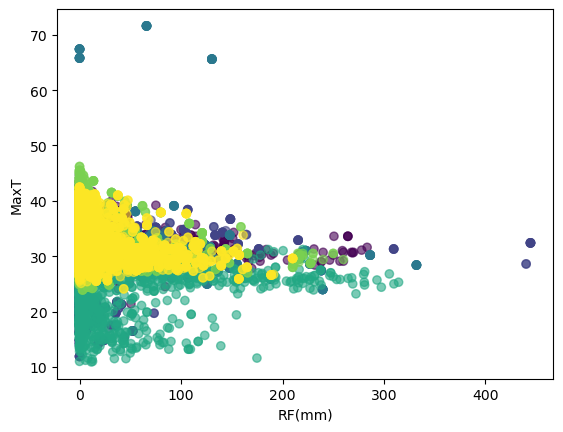

In [35]:
plt.scatter(df['RF(mm)'], df['MaxT'], c=df['Location'], alpha=0.6)
plt.xlabel('RF(mm)')
plt.ylabel('MaxT')
plt.show()

In [7]:
# Normalizando os dados
scaler = StandardScaler()

In [8]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 

dbscan.fit(scaled_X_train)

cluster = np.array(dbscan.labels_)
cluster

array([15, -1, -1, ..., -1, -1, -1])

In [33]:
accuracy_score(y_train_pred, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1, 15523]

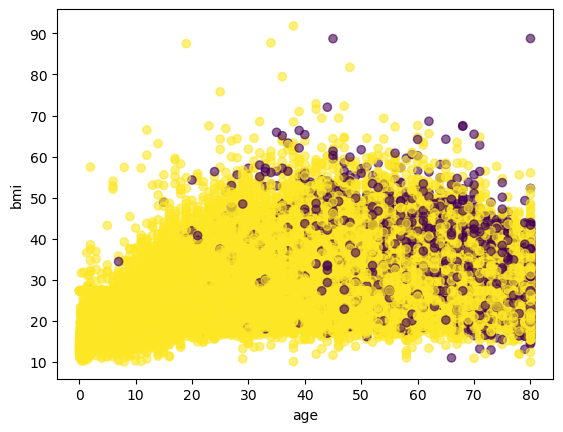

In [28]:
# Visualizando os clusters
plt.scatter(X_train['age'], X_train['bmi'], c=y_train_pred, alpha=0.6)
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

In [26]:
# Create an instance of the DecisionTreeClassifier
model = tree.DecisionTreeClassifier(max_depth=22, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=22)

# Treinar o modelo de árvore de decisão usando os dados de treinamento
start = time.time()
model.fit(X_train, cluster)
tempo = time.time() - start
print(tempo)

0.06655144691467285


In [27]:
X_train

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
5814,1997,9,214.0,0,30.3,18.8,89.7,62.0,0.0,1.5,9.5,24.4,3,2
10097,2004,29,3223.0,0,31.4,25.6,93.4,82.7,7.4,7.6,5.3,4.0,10,2
5112,2000,35,2315.0,0,28.4,23.2,86.3,77.1,0.0,7.0,3.9,3.0,2,2
13735,2007,27,8.0,0,29.9,24.9,85.7,76.7,80.6,14.0,2.2,4.3,9,4
14938,1996,34,1434.0,0,29.3,21.9,88.9,69.1,79.2,2.7,3.1,3.2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1999,20,0.0,4,30.5,19.2,41.3,40.4,53.3,5.7,10.0,5.2,4,3
11964,1995,24,0.0,0,40.6,23.7,51.6,31.0,0.6,13.8,9.2,12.2,2,4
5390,2006,1,1.0,0,26.6,17.8,90.7,75.3,0.0,2.9,8.3,2.7,2,2
860,2002,29,0.0,3,31.8,25.6,92.1,76.4,48.1,4.1,2.2,3.3,2,0


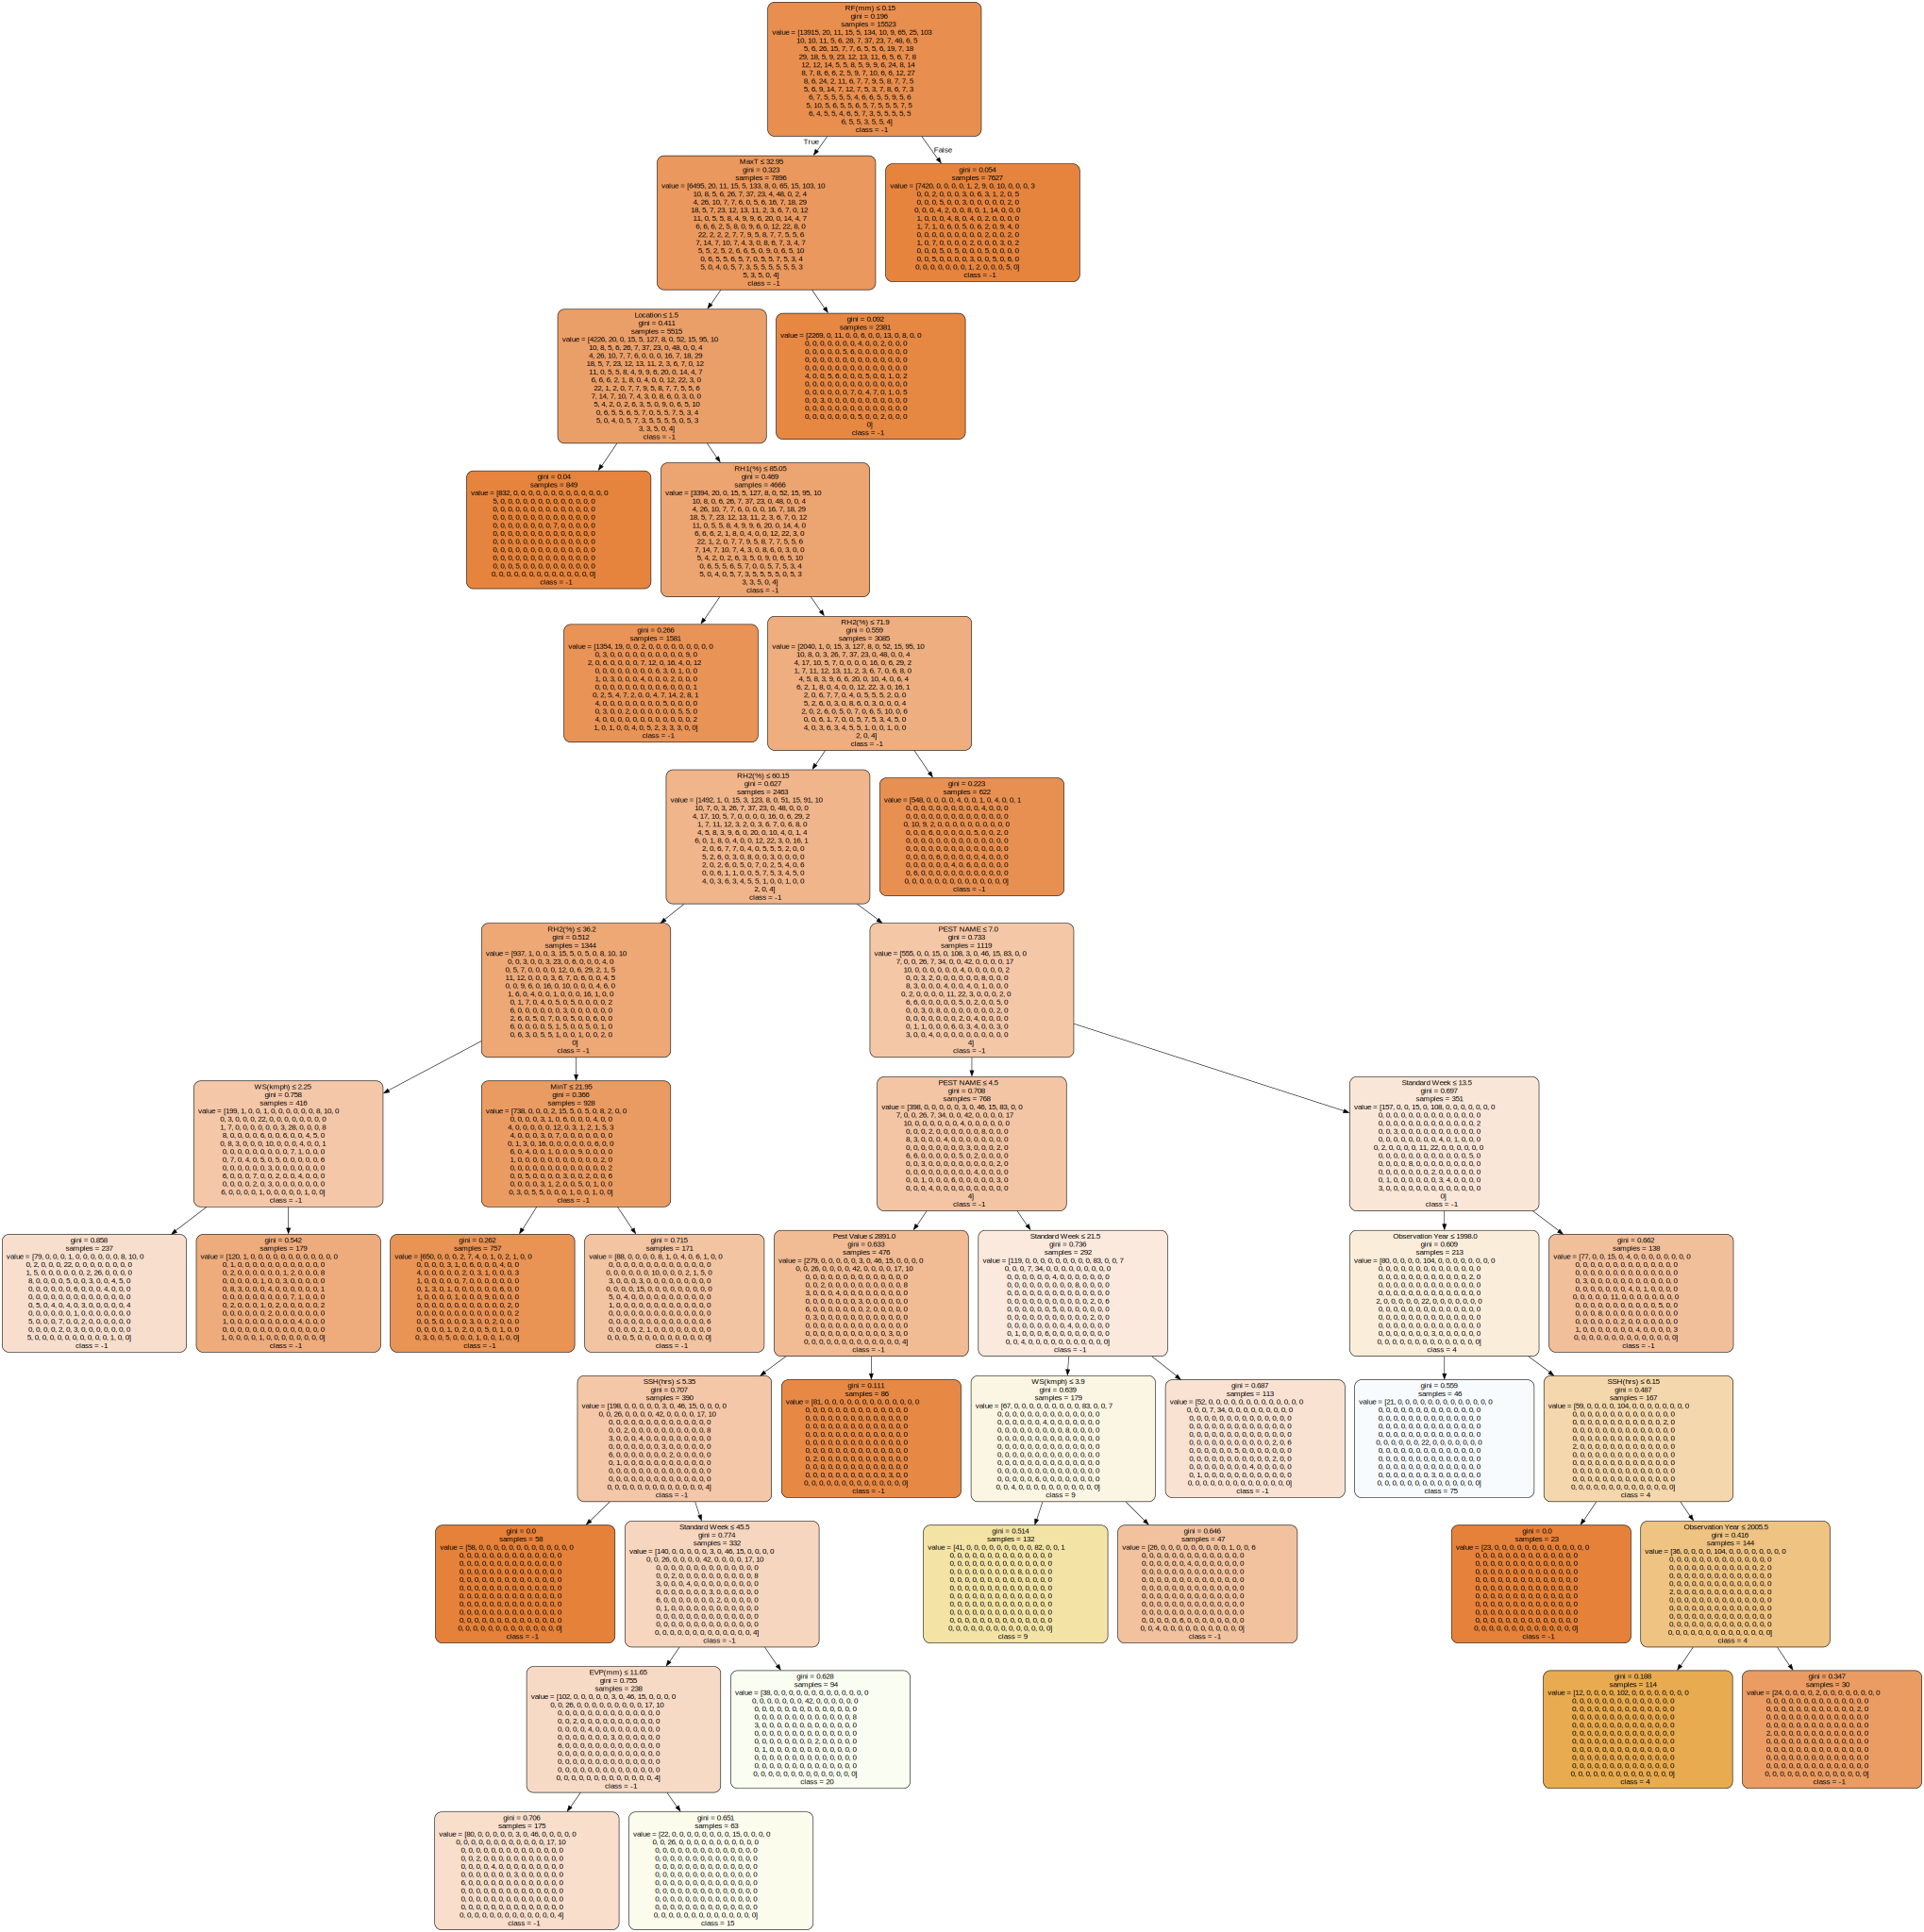

In [32]:
# Export the decision tree as a Graphviz object
feature_names = ['Observation Year','Standard Week', 'Pest Value', 'Collection Type','MaxT', 'MinT', 'RH1(%)', 'RH2(%)', 'RF(mm)', 'WS(kmph)', 'SSH(hrs)', 'EVP(mm)','PEST NAME','Location']

unique_clusters = np.unique(cluster)
target_names = [str(i) for i in unique_clusters]

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.view()
graph

In [33]:
# Calcular a pontuação de precisão do modelo nos dados de teste
print(f'Training accuracy tree: {model.score(X_train, y_train)*100}%')
print(f'Testing accuracy tree: {model.score(X_test, y_test)*100}%')

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets